In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

# Setting up the Fourier Integral

We begin with the final integral in Part 1:

$$\psi(x,y,z) = - \frac{ik}{2\pi} \iint_{-\infty}^{\infty} \psi(x',y') \frac{e^{ikd}}{d} \frac{z}{d} dx' dy' \tag{1}$$

Recall that:

$$d = \left[ (x-x')^2 + (y-y')^2 + z^2 \right]^{1/2}$$

We can pull the $z^2$ term out of the square root:

$$d = z \left[1 + \left(\frac{x-x'}{z}\right)^2 + \left(\frac{y-y'}{z}\right)^2 \right]^{1/2}$$

Now as long as $z>>|x-x'|$ and $z>>|y-y'|$ we can use the binomial approximation in the exponent:

$$d \approx z + \frac{1}{2}\left(\frac{x-x'}{z}\right)^2 + \frac{1}{2}\left(\frac{y-y'}{z}\right)^2$$

For the $1/d$ terms not in the exponent we use $d \approx z$ as these only slightly affect the overall amplitude. However in the exponent these terms can cause diffraction and interference so we leave them in. The equation becomes:

$$\psi(x,y,z) = - \frac{ik}{2\pi} \frac{e^{ikz}}{z} \iint_{-\infty}^{\infty} \psi(x',y') \exp{ \left\{ \frac{ik}{2z}\left[(x-x')^2+(y-y')^2 \right] \right\} }dx' dy' \tag{2}$$

At this point the book mentions to take note that this is a [convolution](https://en.wikipedia.org/wiki/Convolution) over the xy plane:

$$\psi(x,y,z) = - \frac{ik}{2\pi} \frac{e^{ikz}}{z} ( \psi \ast h) (x,y) $$

Where:

$$h(x,y) = \exp{ \left\{ \frac{ik}{2z}\left( x^2+y^2 \right) \right\} }$$

The $(x-x')^2$ and $(y-y')^2$ terms in parentheses can be expanded, giving a different form:

$$\psi(x,y,z) = - \frac{ik}{2\pi} \frac{e^{ikz}}{z} \exp{ \left[ \frac{ik}{2}(x^2+y^2) \right] } \iint_{-\infty}^{\infty} \psi(x',y') \exp{ \left[ \frac{ik}{2z}(x'^2 + y'^2) \right] }  \exp{ \left[ \frac{-ik}{z}(xx'+yy') \right] }dx' dy' \tag{3}$$

At this point the book mentions to take note that this is a [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform). Note that equations (2) and (3) are referred to as the Fresnel Diffraction Integral, and the main approximation being used here is that the phase offsets in $x'$ and $y'$ are quadratic.

# Fraunhofer Diffraction

Suppose light passes through an aperture of maximum size $x_L$ and $y_L$. Now suppose the following is true:

$$z >> \frac{k}{2} \left( x_L^2 + y_L^2 \right) $$

Then we can ignore the $\exp { \left[ \frac{ik}{2z} \left( x'^2 + y'^2 \right) \right] }$ term in equation (3). Note that this approximation, when used with visible light, only holds for very small openings. For instance, visible light is around 400-700nm. Since $k = 2 \pi / \lambda$, if we assume $\lambda \approx 628 \mbox{nm}$, then $k \approx 2 \pi / \left( 628 \cdot 10^{-9} \right)\approx 1e7 \mbox{m}^{-1}$. For a distance of one meter $z \approx 1\mbox{m}$, the aperture needs to be much smaller than $r = \sqrt{x_L^2 + y_L^2} << \sqrt{2 z k} \approx \sqrt{2 \cdot 1 \cdot 10^{-7} m^2} \approx 400 \mu m$. This approximation clearly does not hold for human-scale apertures on the order of centimeters, but can hold for cleverly-cut diffraction gratings on the order of microns.

In cases where this approximation holds, we can eliminate the quadratic exponential term in equation (3):

$$\psi(x,y,z) = - \frac{ik}{2\pi} \frac{e^{ikz}}{z} \exp{ \left[ \frac{ik}{2}(x^2+y^2) \right] } \iint_{-\infty}^{\infty} \psi(x',y')   \exp{ \left[ \frac{-ik}{z}(xx'+yy') \right] }dx' dy'$$

Furthermore, if we are only interested in the intensity $I = |\psi|^2$, then we can ignore the phase terms outside the integral. We can also simplify the amplitude with $k=2 \pi / \lambda$, and assume an aperture of finite size:

$$I(x,y,z) = |\psi|^2 = \left( \frac{1}{\lambda z} \right)^2 \left| \iint_{A} \psi(x',y') \exp{ \left[ - \frac{ik}{z}(xx'+yy') \right] }dx' dy' \right|^2 \tag{4}$$



# Example grating 1: Square Hole

Suppose the aperture is the following:

$$\psi(x',y') = \left\{ \begin{array}{l} \psi_0,  -L_x < x < L_x \mbox{ and } -L_y < y < L_y\\ 0 \mbox{, otherwise} \end{array}\right.$$

The Fraunhofer Amplitude becomes:

$$I(x,y,z) = |\psi|^2 = \left( \frac{\psi_0}{\lambda z} \right)^2 \left| \int_{-L_x}^{L_x} \exp{ \left[ - i \frac{kx}{z} x' \right] } dx' \int_{-L_y}^{L_y} \exp{ - \left[ i \frac{ky}{z} y' \right] } \right|^2dy'$$

Focusing on the just the integral:

$$\int_{-L}^{L} e^{ - i a x } dx = \frac{ e^{ -i a x }}{-i a} \Bigg|_{-L}^{L} = \frac{2iL}{-i a} \frac{\left[ e^{-i a L} - e^{i a L} \right]}{2iL} = L\frac{\sin(aL)}{aL} = L \cdot \mbox{sinc}(aL)$$

$$I(x,y,z) = \left( \frac{L_x L_y \psi_0}{\lambda z} \right)^2 \mbox{sinc}^2\left[kL_x(x/z)\right] \mbox{sinc}^2\left[kL_y(y/z)\right]$$

To interpret this better, note that $x/z$ and $y/z$ only depend on the angle from the z-axis, and for small angles $\tan\theta \approx \theta$. Also note that $k=(2 \pi)/\lambda$, and $A = L_x L_y$ is the area of the aperture:

$$I(x,y,z) = \left( \frac{A \psi_0}{\lambda z} \right)^2 \mbox{sinc}^2 \left[ (L_x/\lambda) 2 \pi \theta_x \right] \mbox{sinc}^2 \left[ (L_y/\lambda) 2 \pi \theta_y \right]$$

The plot below shows an example with 500nm light and a 1mm by 1mm hole. Note the axis is log-scale, so the dots are several orders of magnitude weaker than the bright dot in the middle. Also note this is a special case of [Diffraction Spikes](https://en.wikipedia.org/wiki/Diffraction_spike). As we'll see later, Fraunhofer Diffraction also occurs with lenses.

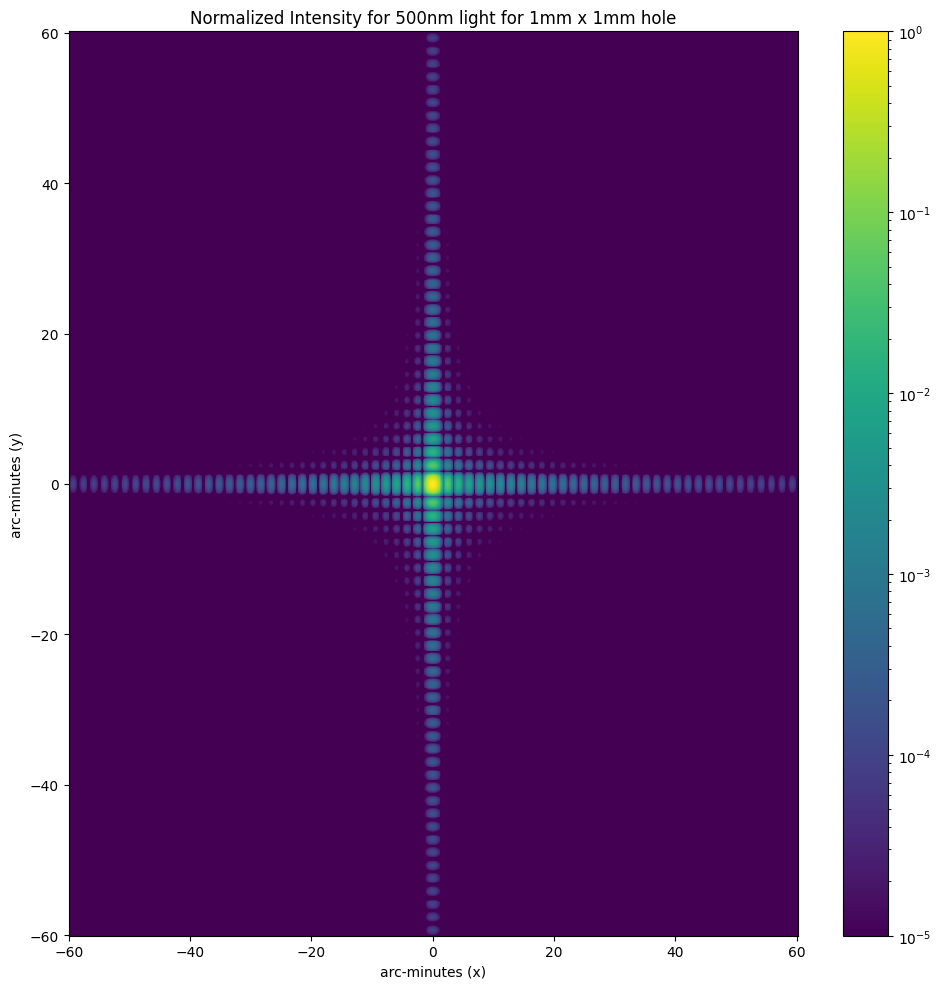

In [61]:
wavelength = 500e-9
Lx = 0.5e-3
Ly = 0.5e-3
max_angle = 60 # arc-minutes
N = 1000

d_angle = (max_angle*2)/N
k = wavelength*2*np.pi
x,y = np.mgrid[-max_angle:(max_angle+d_angle):d_angle, -max_angle:(max_angle+d_angle):d_angle]

# (!) note that np.sinc(x) = sin(pi*x)/(pi*x)
# Need to divide/remove factor of pi to match formula above.
# I figured this out experimentally when trying to match FFT below and counting fringes.
I = (np.sinc((Lx/wavelength)*2*(x*2*np.pi/360)/60)*np.sinc((Ly/wavelength)*2*(y*2*np.pi/360)/60))**2

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax.pcolormesh(x, y, I, norm=colors.LogNorm(vmin=1e-5, vmax=I.max()))
ax.set_xlabel('arc-minutes (x)')
ax.set_ylabel('arc-minutes (y)')
ax.set_title('Normalized Intensity for 500nm light for 1mm x 1mm hole')
fig.colorbar(im1, ax=ax)
fig.tight_layout()
plt.show()

# Example Grating 2: Round Hole

Suppose the aperture is the following:

$$\psi(x',y') = \left\{ \begin{array}{l} \psi_0,  \sqrt{x'^2 + y'^2} < a \\ 0 \mbox{, otherwise} \end{array}\right.$$

We can convert to cylindrical coordinates to solve the integral:

$$\begin{eqnarray}
&& x = \rho \cos \theta \\
&& y = \rho \sin \theta \\
&& x' = \rho' \cos\theta' \\
&& y' = \rho' \sin\theta'
\end{eqnarray}$$

The term in the exponent becomes:

$$xx' + yy' = \rho \rho' \left( \cos \theta \cos \theta' + \sin \theta \sin \theta' \right) = \rho \rho' \cos\left(\theta - \theta'\right) $$

The integral from equation (4) becomes:

$$I(x,y,z) = \left( \frac{\psi_0}{\lambda z} \right)^2 \left| \int_0^{2 \pi} \int_0^a \exp{ \left[ - \frac{ik}{z} \rho \rho' \cos \left( \theta - \theta' \right) \right] } \rho' d\rho' d\theta' \right|^2$$

Theta $\theta'$ integral can be solved using the [zeroth Bessel Function](https://www.wolframalpha.com/input?i=integral%28+e%5E%28i+a+cos%28theta%29%29%29+dtheta+from+theta%3D0+to+2pi).:

$$\int_0^{2\pi} e^{i a cos\theta} d\theta = 2 \pi J_0(a)$$

Note the $\theta'$ integral covers one period and is unaffected by the constant offset $\theta$. The integral becomes:

$$I(x,y,z) = \left( \frac{2 \pi \psi_0}{\lambda z} \right)^2 \left| \int_0^a J_0\left(\frac{k\rho}{z} \rho'\right) \rho' d\rho' \right|^2$$

The $r'$ integral can be solved using the [first Bessel Function](https://www.wolframalpha.com/input?i=integral%28J0%28bx%29+x+dx+from+x+%3D+0+to+a%29):

$$\int_0^a J_0(bx) x dx = \frac{a}{b} J_1(a b) = a^2 \frac{J_1(ab)}{ab} = a^2 \mbox{Jinc}(ab)$$

The result becomes:

$$I(r,\theta,z) = \left( \frac{2 \pi a^2 \psi_0}{\lambda z} \right)^2 \Bigg| \mbox{Jinc} \left( ak\rho/z \right) \Bigg|^2$$

Similar to the rectangular case, we can re-write this equation to make it more interpretable. First, let $A = \pi a^2$ be the area of the aperture. Second, note that $\rho/z = \sin\theta \approx \theta$ only depends on the angle from the z-axis. Third, we can re-write $k$ in terms of $\lambda$ in the Jinc expression to get a result directly dependent on the $a/\lambda$ ratio:

$$I(\theta,z) = \left( \frac{A \psi_0}{\lambda z} \right)^2 \Bigg| 2 \cdot \mbox{Jinc} \left[ (a/\lambda) 2 \pi \theta \right] \Bigg|^2$$

The diffraction pattern pattern is shown below for 500nm light with a 1mm diameter hole. This is a well-known pattern called [Airy Rings](https://en.wikipedia.org/wiki/Airy_disk). Also note that $\mbox{Jinc}(x)=0$ first occurs at $x_0 \approx 4.49$. Letting $d=2a$ be the diameter of the opening, the first zero occurs at $\theta = (x_0 / \pi) \cdot (\lambda/d) \approx 1.22 \lambda/d$. This is a famous result and is known as the [Diffraction Limit](https://en.wikipedia.org/wiki/Diffraction-limited_system).

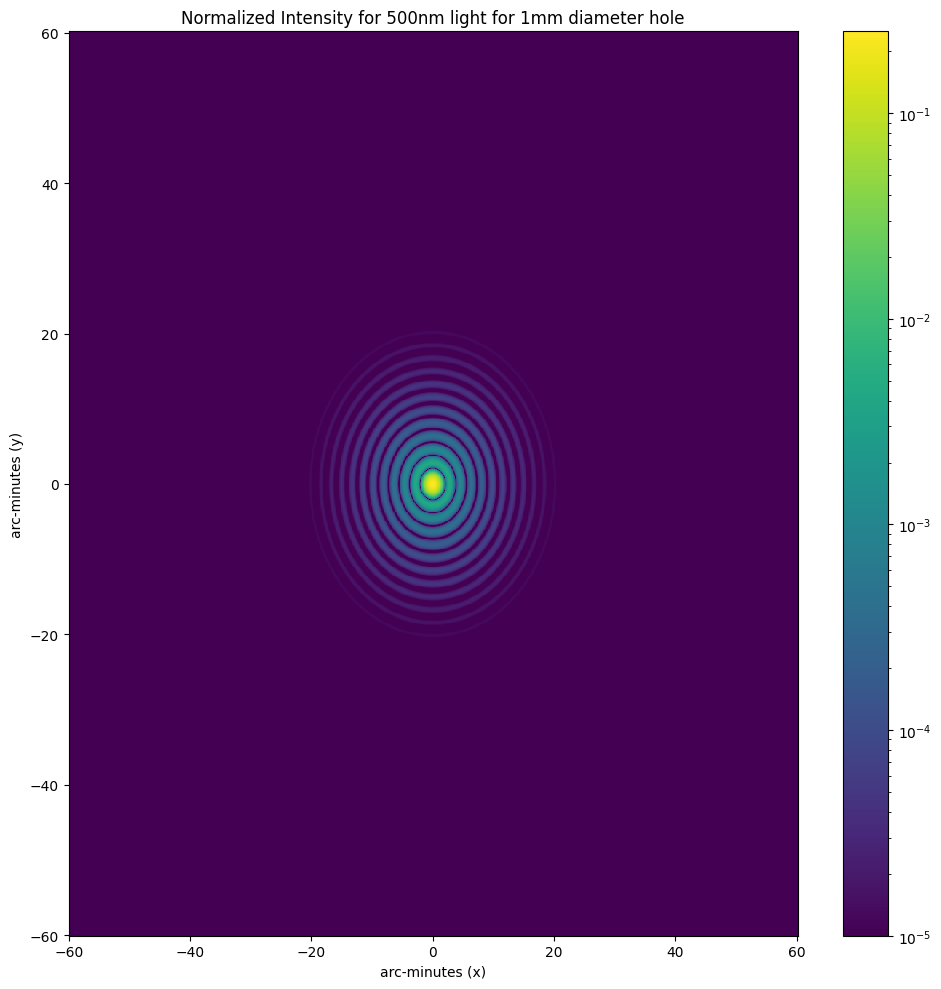

In [62]:
from scipy.special import j1
def jinc(x):
    if x == 0.0:
        return 0.5
    return j1(x) / x
jinc_v = np.vectorize(jinc)

wavelength = 500e-9
a = 0.5e-3
max_angle = 60 # arc-minutes
N = 1000

d_angle = (max_angle*2)/N
k = wavelength*2*np.pi
x,y = np.mgrid[-max_angle:(max_angle+d_angle):d_angle, -max_angle:(max_angle+d_angle):d_angle]
theta = np.sqrt(x**2 + y**2)
I = (jinc_v((a/wavelength)*2*np.pi*(theta*2*np.pi/360)/60))**2
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im1 = ax.pcolormesh(x, y, I, norm=colors.LogNorm(vmin=1e-5, vmax=I.max()))
ax.set_xlabel('arc-minutes (x)')
ax.set_ylabel('arc-minutes (y)')
ax.set_title('Normalized Intensity for 500nm light for 1mm diameter hole')
fig.colorbar(im1, ax=ax)
fig.tight_layout()
plt.show()

# Fourier Interpretation

There's an abstraction we can make with Fourier Transforms. Recall the definition of the two-dimensional Fourier Transform and Inverse Fourier Transform. Note the factors of $2 \pi$ in the exponents, which avoids annoying factors $1/2 \pi$ later on, eg see [here](https://see.stanford.edu/materials/lsoftaee261/chap8.pdf) and [here](https://mathoverflow.net/questions/265299/the-2-pi-in-the-definition-of-the-fourier-transform).

$$\hat{f}(\nu_x, \nu_y) = \mathcal{F} \big[ f \big] = \iint_{-\infty}^{\infty} f(x,y) \exp{ \left[ -2 \pi i (x \nu_x + y \nu_y) \right] } dx dy$$

$$f(x,y) = \mathcal{F^{-1}} \big[ \hat{f} \big] = \iint_{-\infty}^{\infty} \hat{f}(\nu_x, \nu_y) \exp{ \left[ 2 \pi i (x \nu_x + y \nu_y) \right] } d\nu_x d\nu_y$$

Here, $\nu_x$ and $\nu_y$ are frequencies with inverse units of $x$ and $y$. In eqn (4) above, we can define:

$$\nu_x = \frac{x'}{\lambda z}, \nu_y = \frac{y'}{\lambda z}$$

Now eqn (4) becomes: 

$$I(x,y,z) = \left( \frac{1}{\lambda z} \right)^2 \Bigg| \iint_{A(\nu_x,\nu_y)} \psi \left( \nu_x=\frac{x'}{\lambda z},\nu_y=\frac{y'}{\lambda z} \right) \exp{ \left[ - 2 \pi i (x\nu_x+y\nu_y) \right] }d\nu_x d\nu_y \Bigg|^2$$

This lets us write $I$ in terms of a Fourier Transform of $\psi$ against the aperture, where we divide $x$ and $y$ by $\lambda z$ to get the frequencies:

$$I(x,y,z) = \left( \frac{1}{\lambda z} \right)^2 \mathcal{F}^2 \left[ \psi \left(\frac{x'}{\lambda z}, \frac{y'}{\lambda z}\right) \right]$$

In other words, we start with an aperture that has real-world coordinates $\psi(x',y',z'=0)$ with dimensions of length, divide the real-world coordinates by $\lambda z$ so it has dimensions of inverse length, then run a Fourier Transform on that function to get back the real-world coordinates of $\psi(x,y,z)$ with dimensions of length.

Recall how the equations for the square and circular apertures depended on $\theta_x$ and $\theta_y$ instead of $x$ and $y$. Let's look at equation (4) again but with $\theta_x=x/z$ and $\theta_y=y/z$:

$$I(\theta_x,\theta_y,z) = |\psi|^2 = \left( \frac{1}{\lambda z} \right)^2 \left| \iint_{A} \psi(x',y') \exp{ \left[ - ik(\theta_x x'+ \theta_y y') \right] }dx' dy' \right|^2$$

The equation for intensity becomes:

$$I(\theta_x, \theta_y ,z) = \left( \frac{1}{\lambda z} \right)^2 \mathcal{F}^2 \left[ \psi \left(\frac{x'}{\lambda}, \frac{y'}{\lambda}\right) \right]$$

To calculate this numerically, suppose the aperture is contained within a numerical grid with $N \times N$ values and physical size $L \times L$, and light has wavelength $\lambda$. We divide the $x$ and $y$ values in the grid by $\lambda$, giving us a new grid of size $L/\lambda \times L/\lambda$ with units of $\mbox{rad}^{-1}$. Note these units are chosen in anticipation of running a Fourier Transform which should produce units of $1/\mbox{rad}^{-1}=\mbox{rad}$.

This [Stack Overflow post](https://stackoverflow.com/questions/4364823/how-do-i-obtain-the-frequencies-of-each-value-in-an-fft) explains how to get the frequencies from the FFT operation. There's a concept called sampling rate $f_s$ which is the number of samples per unit interval. For instance, digital sound typically has a sampling rate of 44.1 kHz. The formula for sampling rate is $N / T$, where $T$ is the interval size, which in our case is $T=L/\lambda$. Therefore, $f_s = N / (L/\lambda) = N \lambda / L$, which has units of $\mbox{rad}$.

Each FFT frequency bin has a size $\Delta f = f_s / N = \lambda / L$ and range from $f_\mbox{min} = 0$ up to $f_\mbox{max} = f_s(N/2 - 1) \approx N \lambda / (2L)$. Note the FFT continues on from $N/2+1$ up until $N$ but these are just complex conjugates of the lower frequencies with no new information. In our case the "frequencies" are actually just angles and not "per" something, since frequencies are normally the output from the FFT. The main formulas are mentioned below, which have units of $\mbox{rad}$:

$$\Delta \theta = \frac{\lambda}{L}$$
$$\theta_\mbox{max} \approx \frac{N \lambda}{2L}$$

Something to note is that as we increase the number of points in the simulation, we can increase the max angle that can be calculated by the FFT.

The plots below show a bunch of random interesting diffraction patterns I felt like trying. Note the first two (square/circle) are the same as above, and are more of a sanity check that I got the units right.

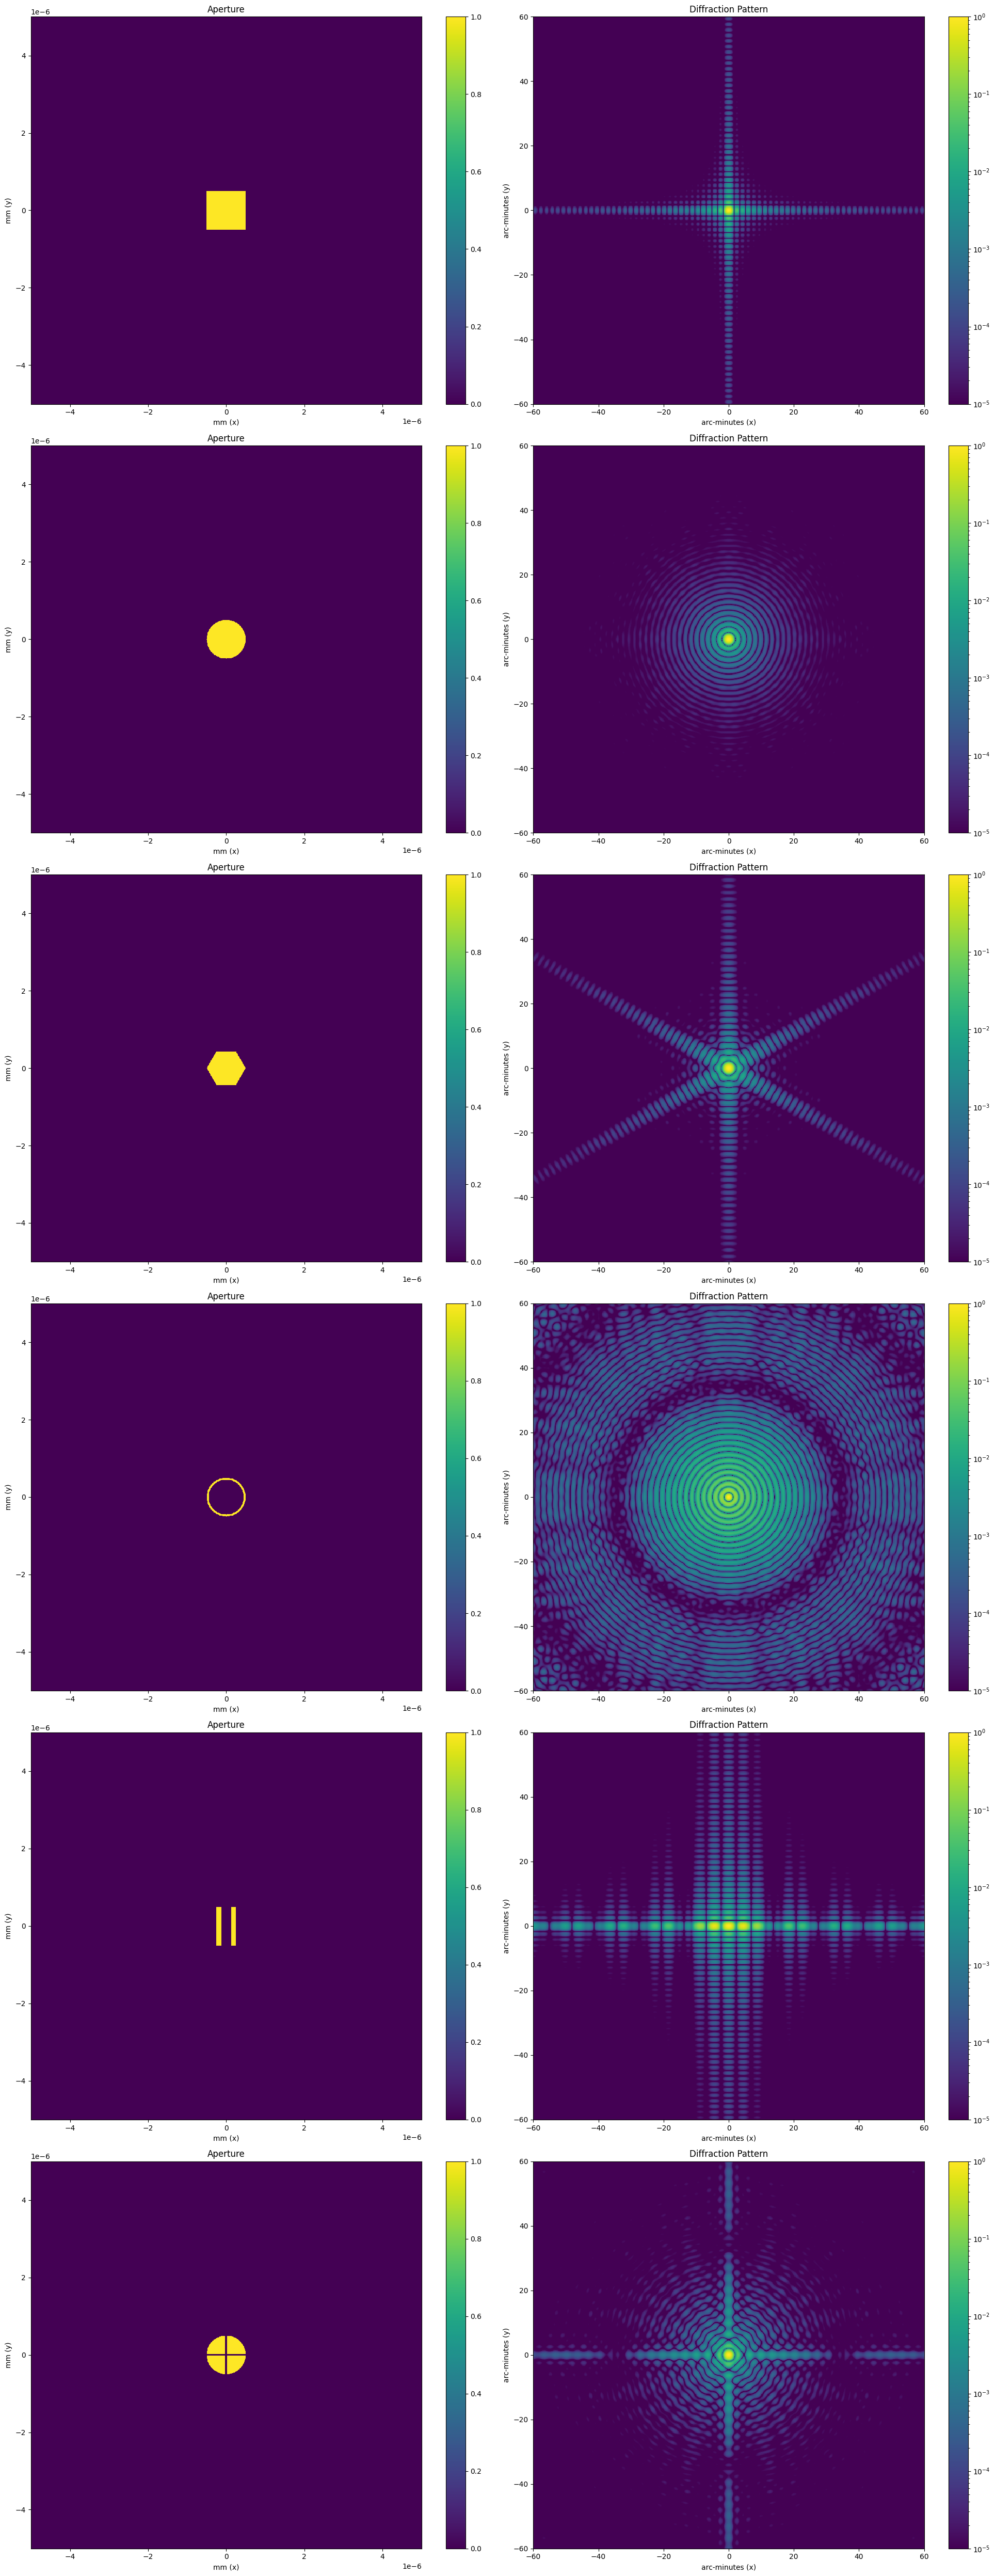

In [63]:
from matplotlib import path
fig, axs = plt.subplots(6, 2, figsize=(20, 50))

wavelength = 500e-9 # 500nm
Lx = 5e-3 # 5mm
Ly = 5e-3
N = 1000
min_v = -Lx
max_v = Lx
L = (max_v - min_v)
d_v = L / N

max_plot_angle = 60

lim = 5e-4
x,y = np.mgrid[min_v:(max_v+d_v):d_v, min_v:(max_v+d_v):d_v]

# I have no clue why I have to divide by an extra pi at the end but it's necessary based on counting #fringes at max_angle=10am and comparing above
d_theta = wavelength / L
x_theta, y_theta = np.mgrid[-N/2:N/2+1:1, -N/2:N/2+1:1] * d_theta * (360/(2*np.pi)) * 60

def plot(A, ax_A, ax_I):
    F = np.fft.fftshift(np.fft.fft2(A))
    I = np.abs(F)**2
    I = I / I.max()

    im_A = ax_A.pcolormesh(x/1000, y/1000, A)
    ax_A.set_xlabel('mm (x)')
    ax_A.set_ylabel('mm (y)')
    ax_A.set_title('Aperture')
    fig.colorbar(im_A, ax=ax_A)

    im_I = ax_I.pcolormesh(x_theta, y_theta, I, norm=colors.LogNorm(vmin=1e-5, vmax=I.max()))
    ax_I.set_xlabel('arc-minutes (x)')
    ax_I.set_ylabel('arc-minutes (y)')
    ax_I.set_title('Diffraction Pattern')
    ax_I.set_xlim(-max_plot_angle, max_plot_angle)
    ax_I.set_ylim(-max_plot_angle, max_plot_angle)
    fig.colorbar(im_I, ax=ax_I)

A_rect = np.logical_and(np.abs(x)<=lim, np.abs(y)<=lim).astype(int)
plot(A_rect, axs[0,0], axs[0,1])

A_circ = (np.sqrt(x**2+y**2)<=lim).astype(int)
plot(A_circ, axs[1,0], axs[1,1])

A_hex = np.logical_and(np.abs(y)<=np.sqrt(3)*lim/2, np.abs(y)<=np.sqrt(3)*(lim-np.abs(x)))
plot(A_hex, axs[2,0], axs[2,1])

r = np.sqrt(x**2+y**2)
A_ring = np.logical_and(r<=lim, r>=(lim*(9/10)))
plot(A_ring, axs[3,0], axs[3,1])

A_double_slit = np.logical_and(np.logical_and(np.abs(y)<=lim, np.abs(x)<=lim/2), np.abs(x)>=lim/4)
plot(A_double_slit, axs[4,0], axs[4,1])

A_cross_in_circle = np.logical_and(np.logical_and(np.abs(x) >= lim/20, np.abs(y) >= lim/20), (r <= lim))
plot(A_cross_in_circle, axs[5,0], axs[5,1])

fig.tight_layout()
plt.show()